# Import libarires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# 1 - Data cleaning

In [ ]:
# Load the dataset
df = pd.read_csv('data\\final_data\\allworkers.csv')

# Preview the first few rows
print(df.head())
print(df.shape)

   Minute  Label  Knife_Sharpness_Category  Shift  Pelvis x_Vel  Pelvis y_Vel  \
0       0      4                         0      1           0.0           0.0   
1       1      4                         0      1           0.0           0.0   
2       2      4                         0      1           0.0           0.0   
3       3      0                         0      1           0.0           0.0   
4       4      0                         0      1           0.0           0.0   

   Pelvis z_Vel  L5 x_Vel  L5 y_Vel  L5 z_Vel  ...  Left Lower Leg y_Acc  \
0           0.0  0.027806 -0.051742  0.198527  ...             -0.070723   
1           0.0  0.043772 -0.035047  0.252839  ...              0.056990   
2           0.0 -0.019464  0.056012  0.228783  ...              0.253975   
3           0.0 -0.136964  0.101034  0.211410  ...             -0.406729   
4           0.0 -0.040060 -0.060612  0.178886  ...              0.059038   

   Left Lower Leg z_Acc  Left Foot x_Acc  Left Foot y_Ac

In [3]:
print(df.columns)

Index(['Minute', 'Label', 'Knife_Sharpness_Category', 'Shift', 'Pelvis x_Vel',
       'Pelvis y_Vel', 'Pelvis z_Vel', 'L5 x_Vel', 'L5 y_Vel', 'L5 z_Vel',
       ...
       'Left Lower Leg y_Acc', 'Left Lower Leg z_Acc', 'Left Foot x_Acc',
       'Left Foot y_Acc', 'Left Foot z_Acc', 'Left Toe x_Acc',
       'Left Toe y_Acc', 'Left Toe z_Acc', 'Main_Activity', 'Worker'],
      dtype='object', length=144)


## 1.1 - Check for missing values

In [4]:
missing_values = df.isnull().sum()

# print the columns whose missing values are greater than 0
print(missing_values[missing_values > 0])
# print(missing_values)
# print(df.shape)

Series([], dtype: int64)


-> There is no missing values in the dataset

## 1.2 - Check for duplicates

In [5]:
# Check for duplicates
duplicates = df.duplicated().sum()

print(duplicates)

0


-> There is no duplicates in the dataset

## 1.3 - Drop unecessary columns

In [6]:
# select columns with constant values
constant_columns = df.columns[df.nunique() <= 1]
print(constant_columns)

# Drop the constant columns
df.drop(constant_columns, axis=1, inplace=True)

# Drop the minutes column if exists
if 'Minute' in df.columns:
    df.drop(['Minute'], axis=1, inplace=True)

# Drop the worker column if exists
if 'Worker' in df.columns:
    df.drop(['Worker'], axis=1, inplace=True)

if 'Shift' in df.columns:
    df.drop(['Shift'], axis=1, inplace=True)


print (df.shape) 

Index(['Pelvis x_Vel', 'Pelvis y_Vel', 'Pelvis z_Vel', 'Pelvis x_Acc',
       'Pelvis y_Acc', 'Pelvis z_Acc'],
      dtype='object')
(8840, 135)


## 1.4 - Fix data types

In [7]:
# 2. Fix data types
df['Label'] = df['Label'].astype('category')
df['Main_Activity'] = df['Main_Activity'].astype('category')
df['Knife_Sharpness_Category'] = df['Knife_Sharpness_Category'].astype('category')

## 1.3 - Handle outliers

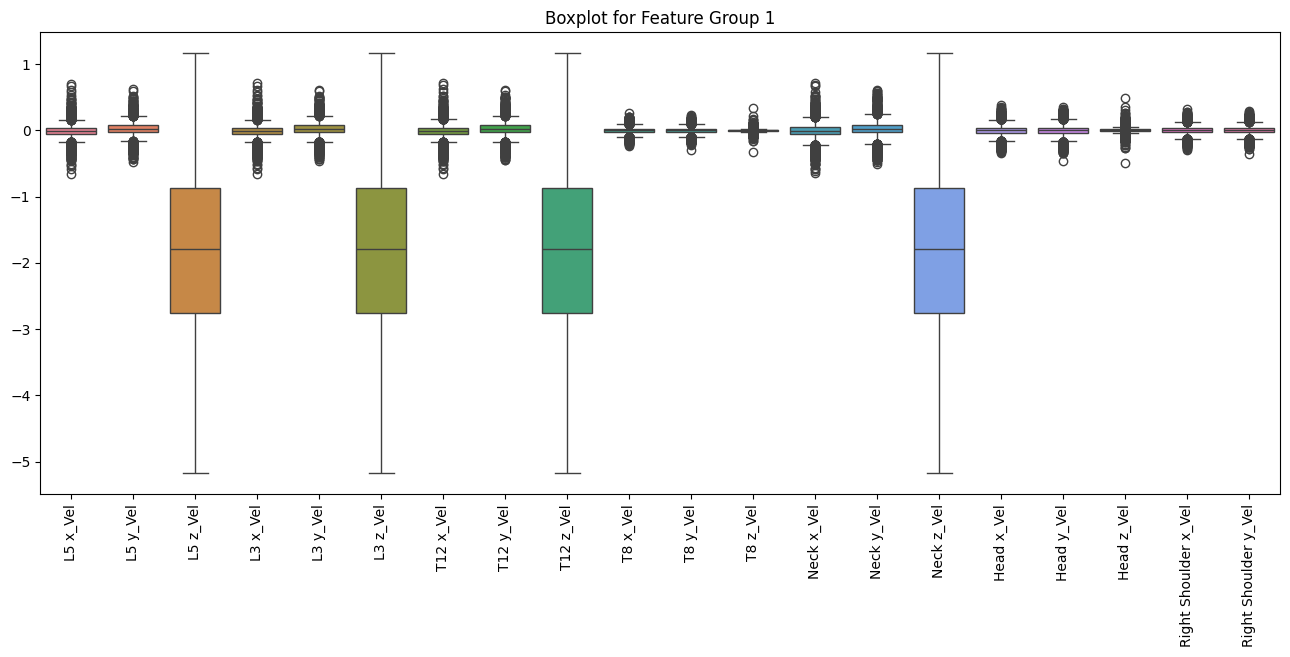

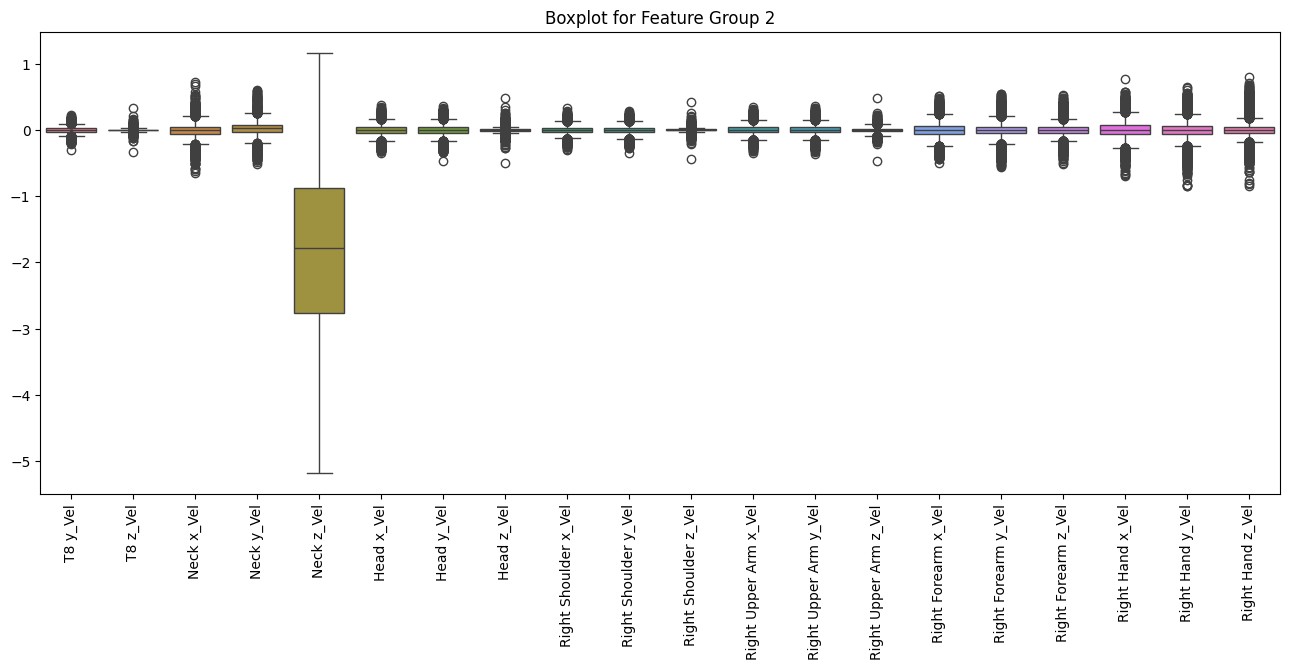

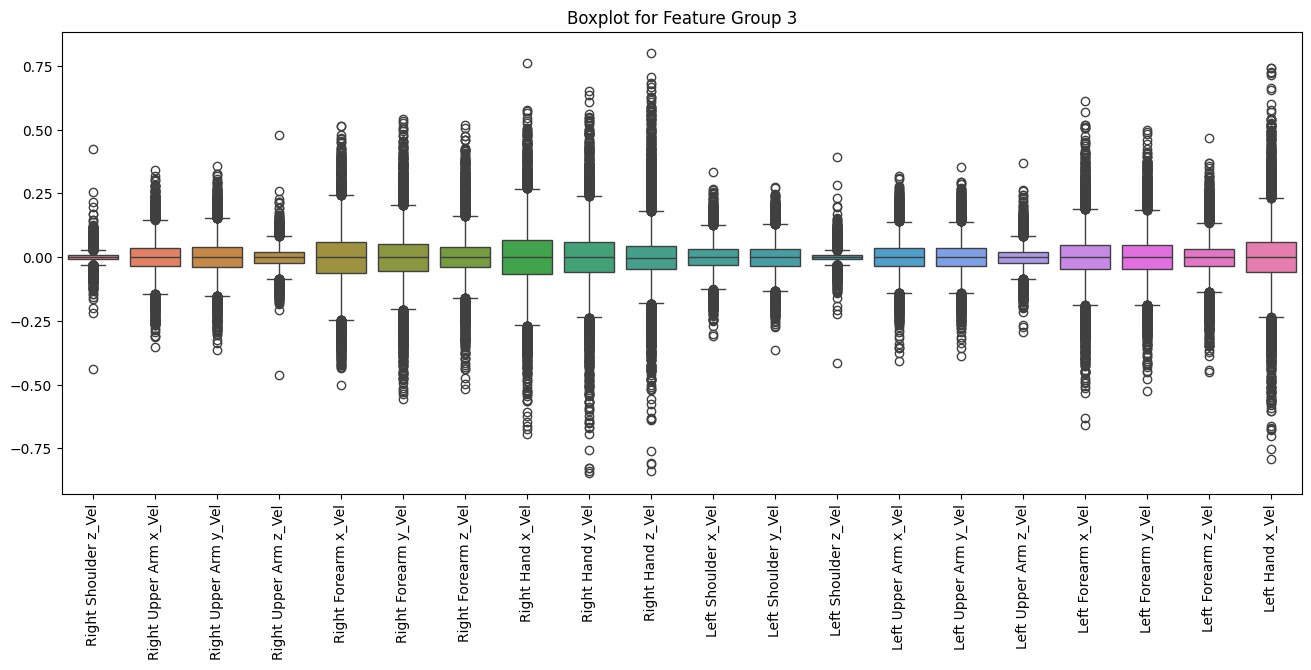

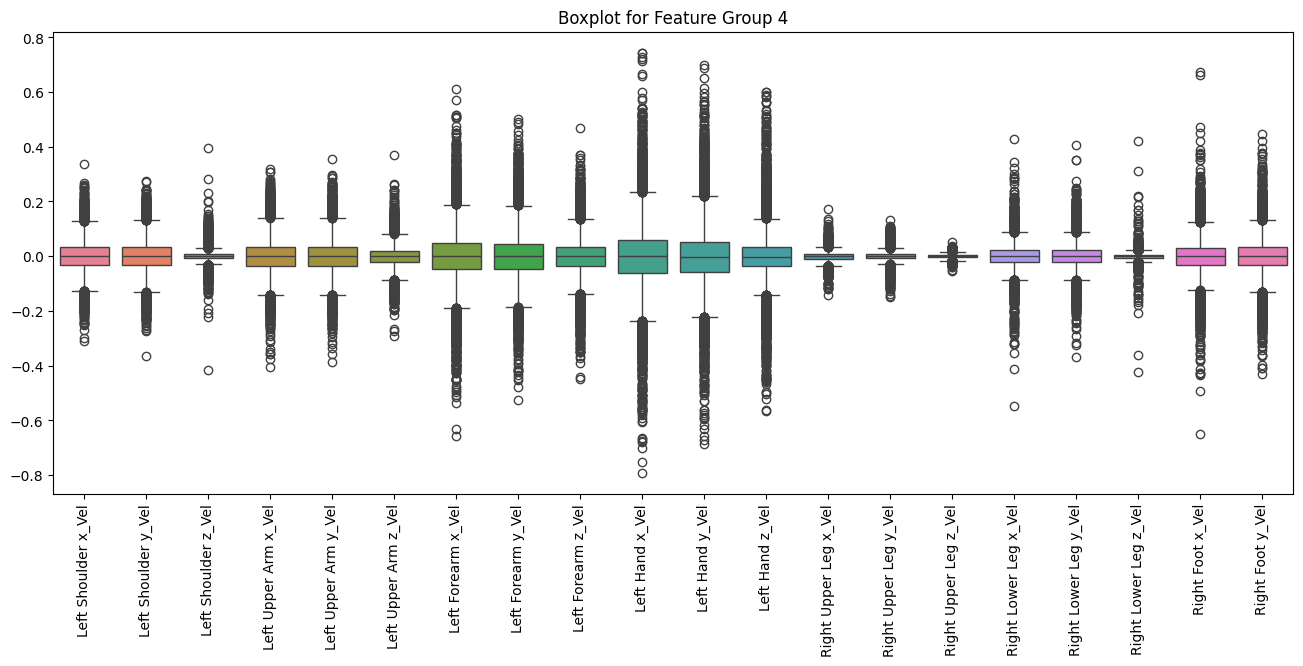

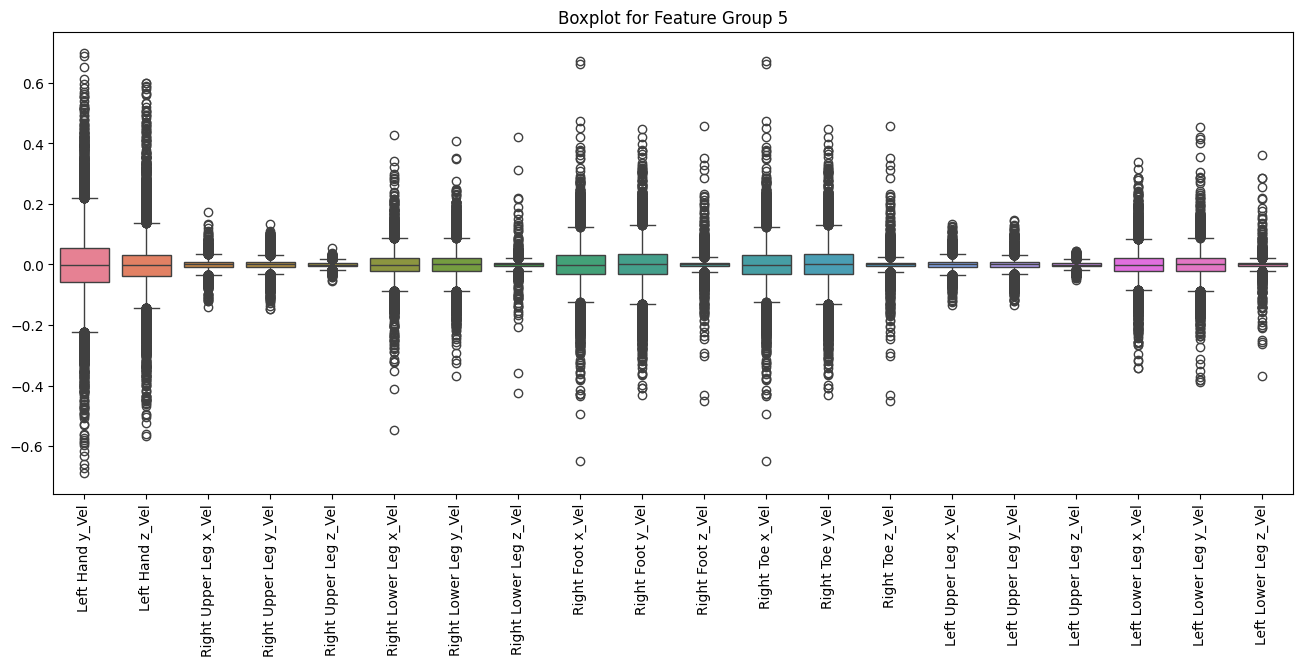

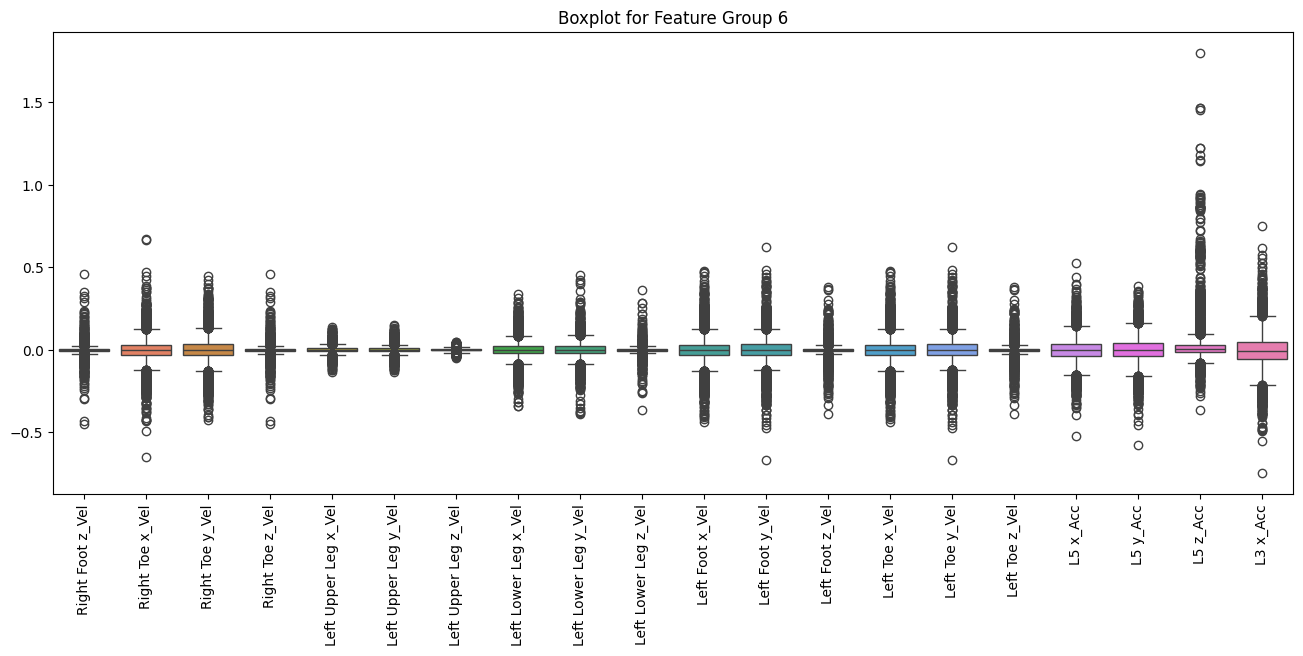

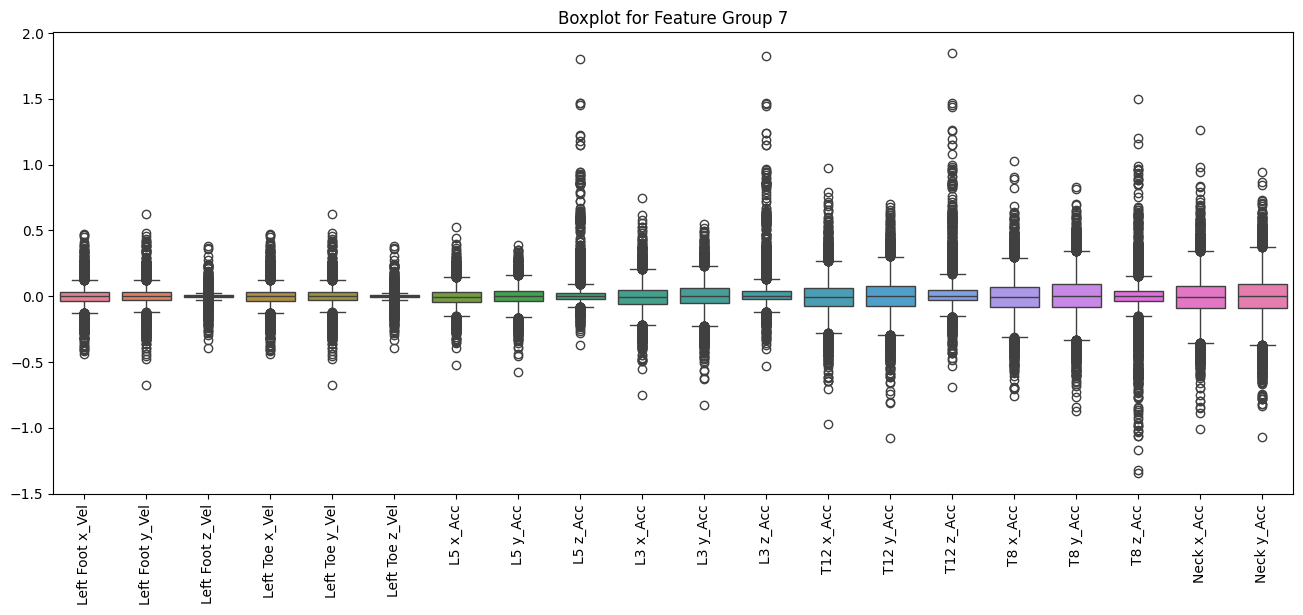

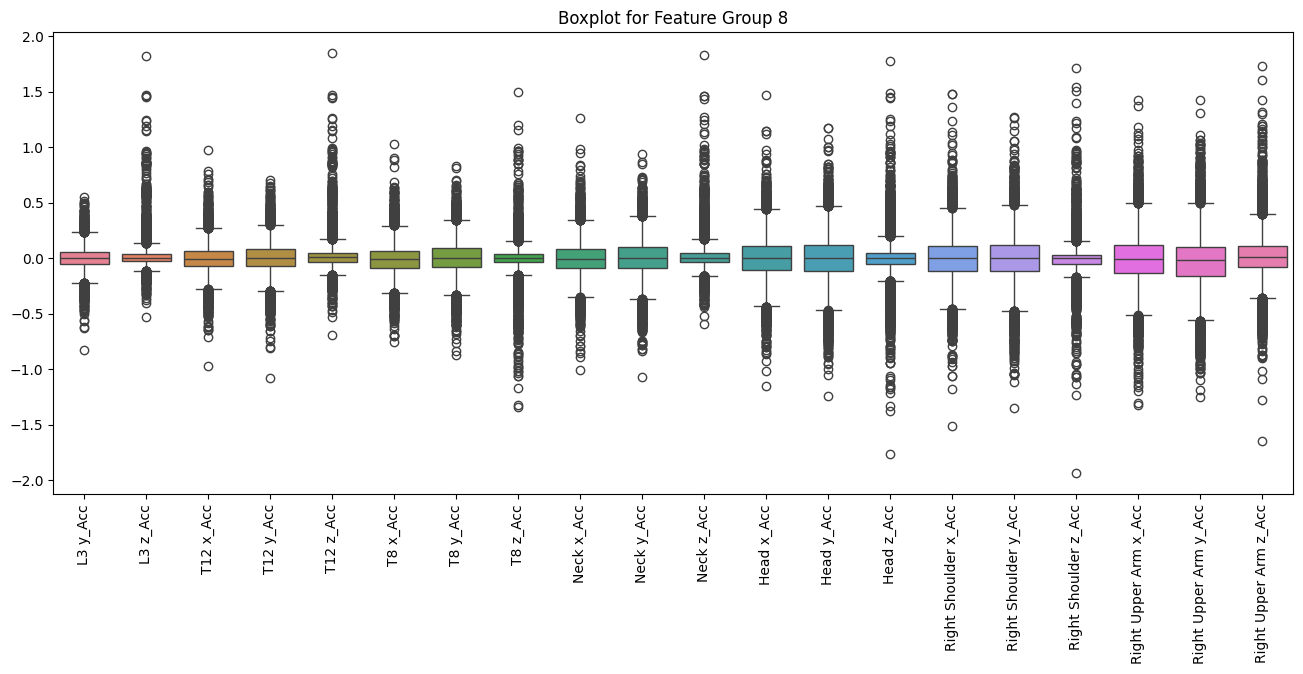

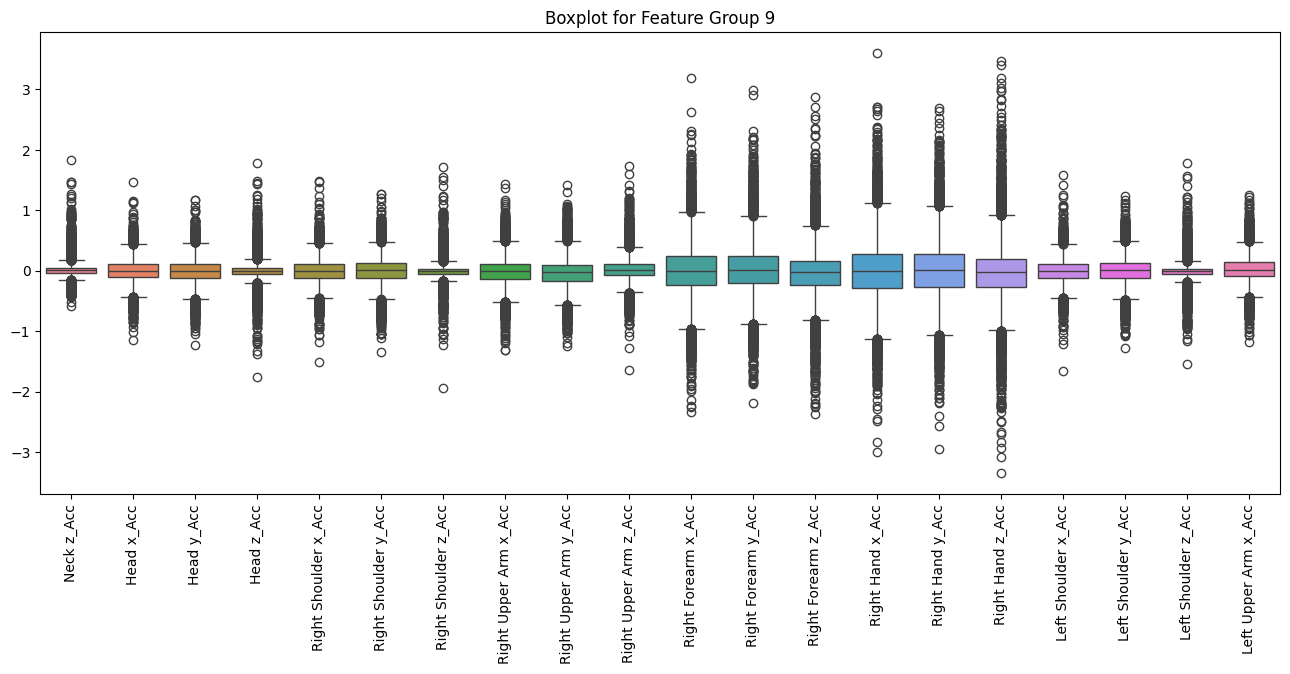

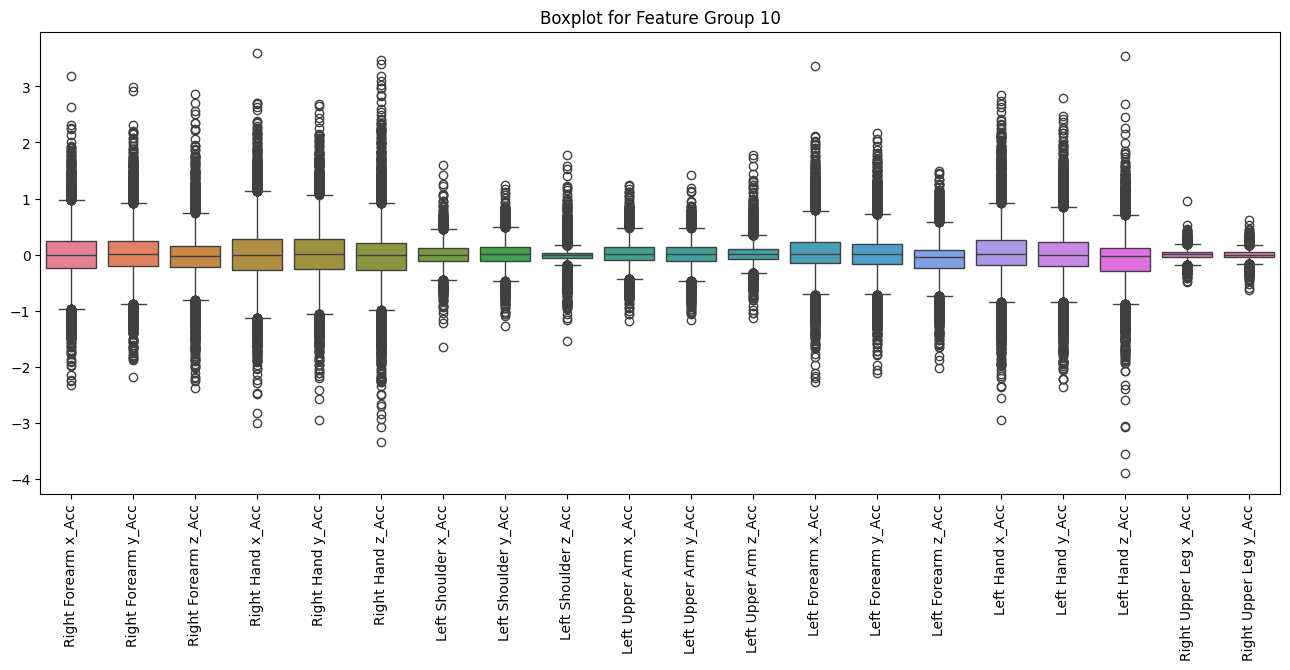

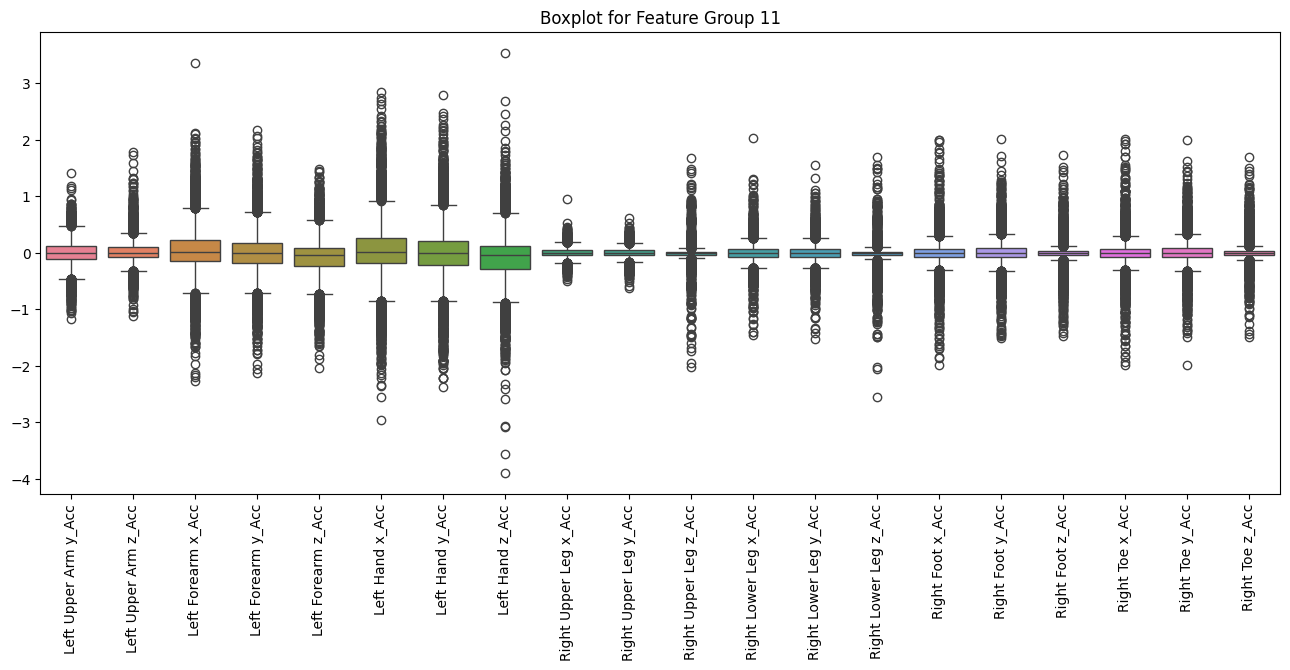

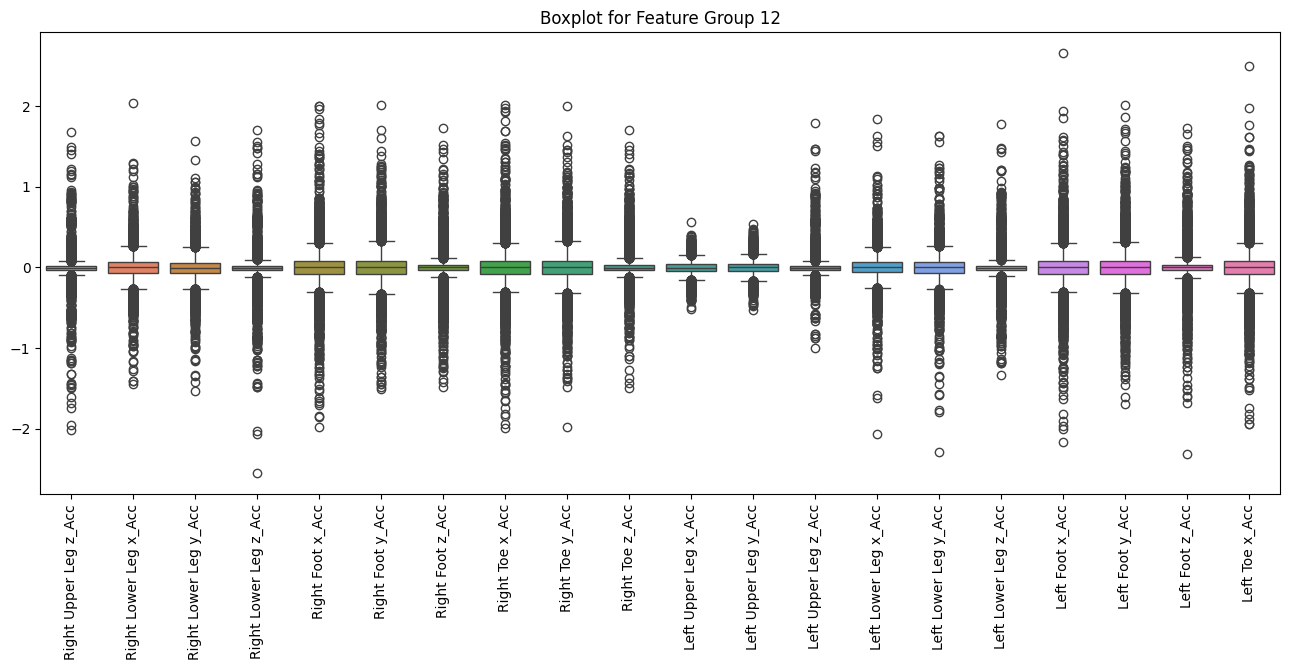

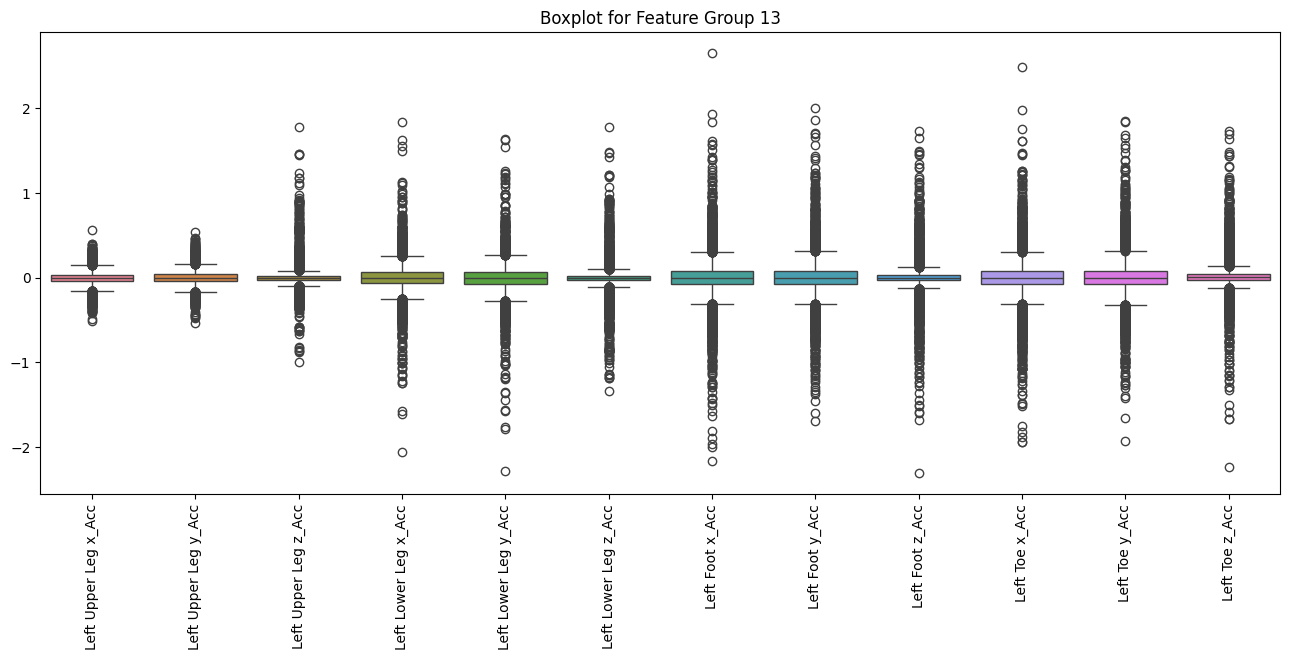

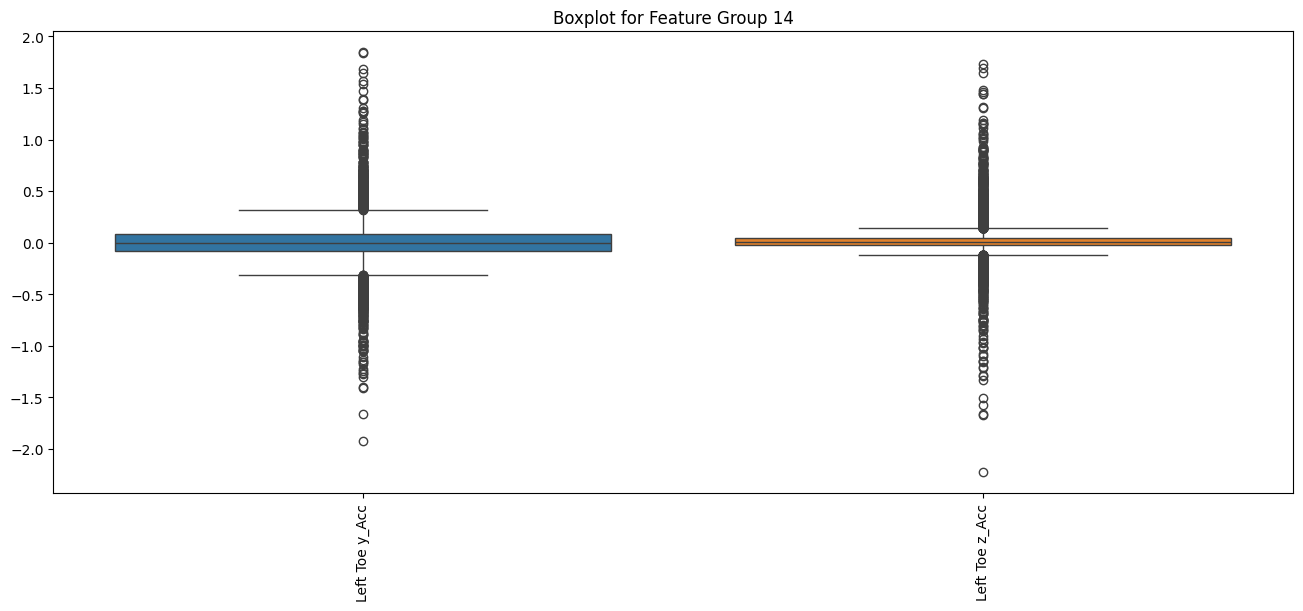

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize outliers using boxplots
def plot_outliers(df, feature_groups):
    for i, group in enumerate(feature_groups):
        plt.figure(figsize=(16, 6))
        sns.boxplot(data=df[group])
        plt.xticks(rotation=90)
        plt.title(f'Boxplot for Feature Group {i+1}')
        plt.show()

# Select numerical columns for visualization
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Divide numerical features into groups of 20 for visualization

feature_groups = [numerical_columns[i:i+20] for i in range(0, len(numerical_columns), 10)]

# Call the function to visualize the outliers for each group
plot_outliers(df, feature_groups)


### Handle outliers using winsorization

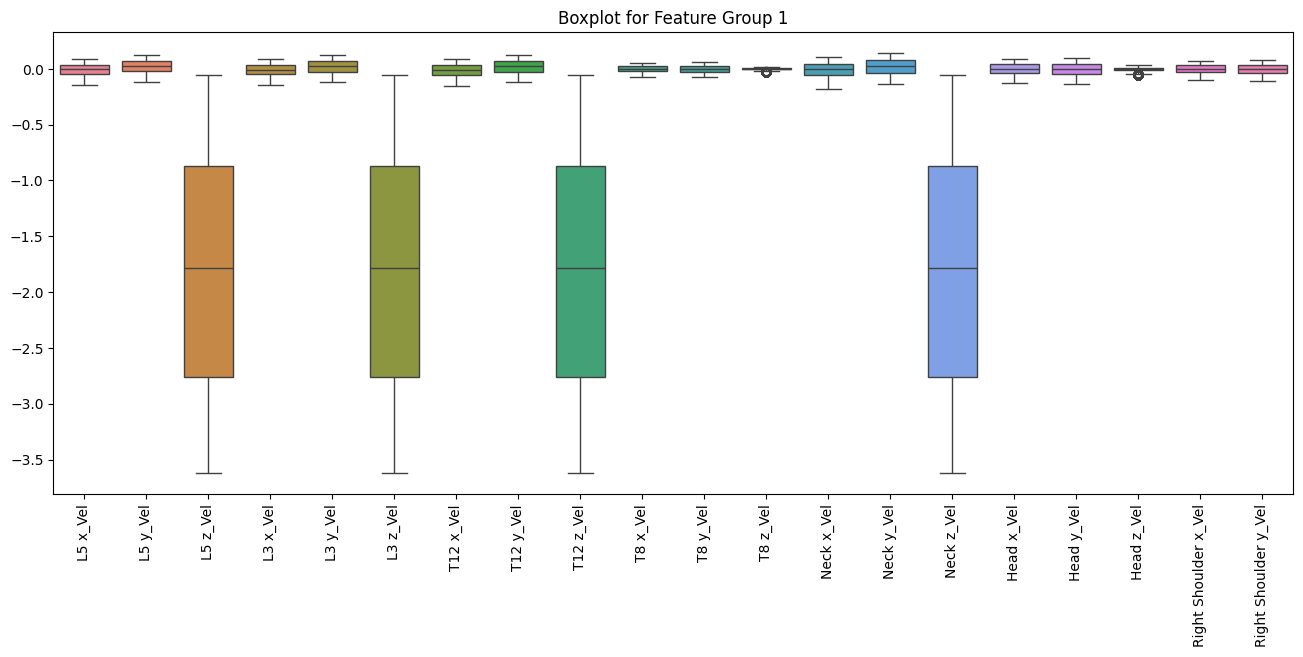

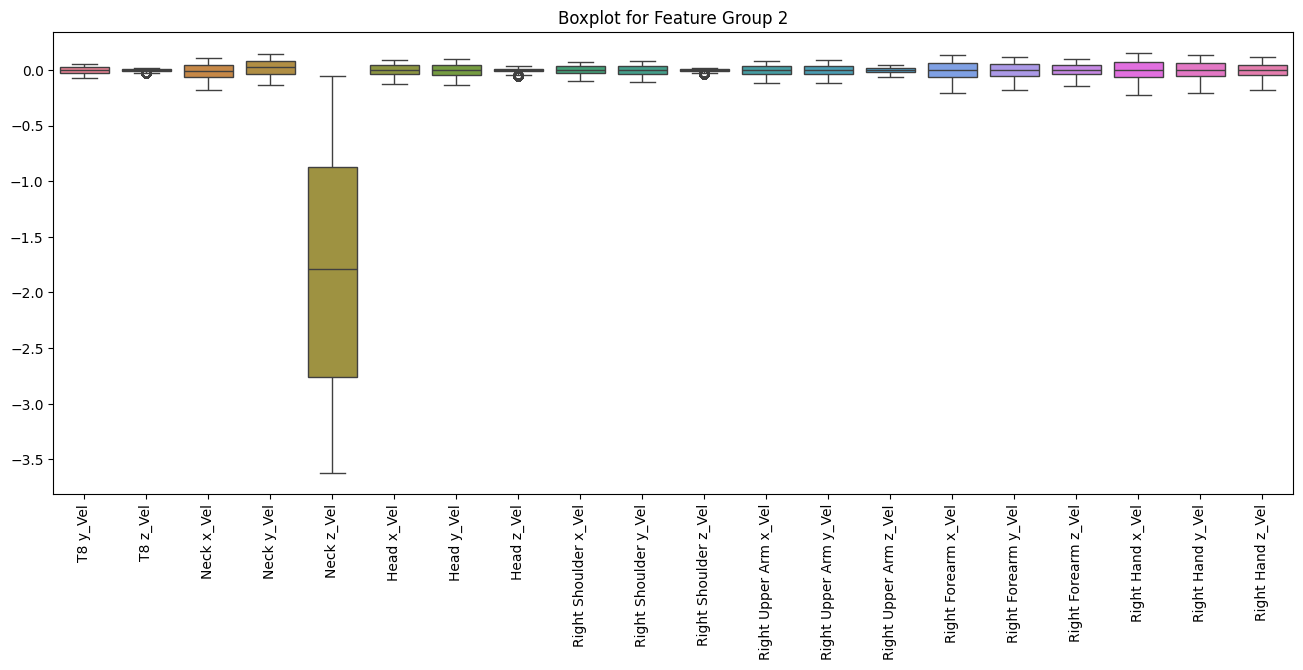

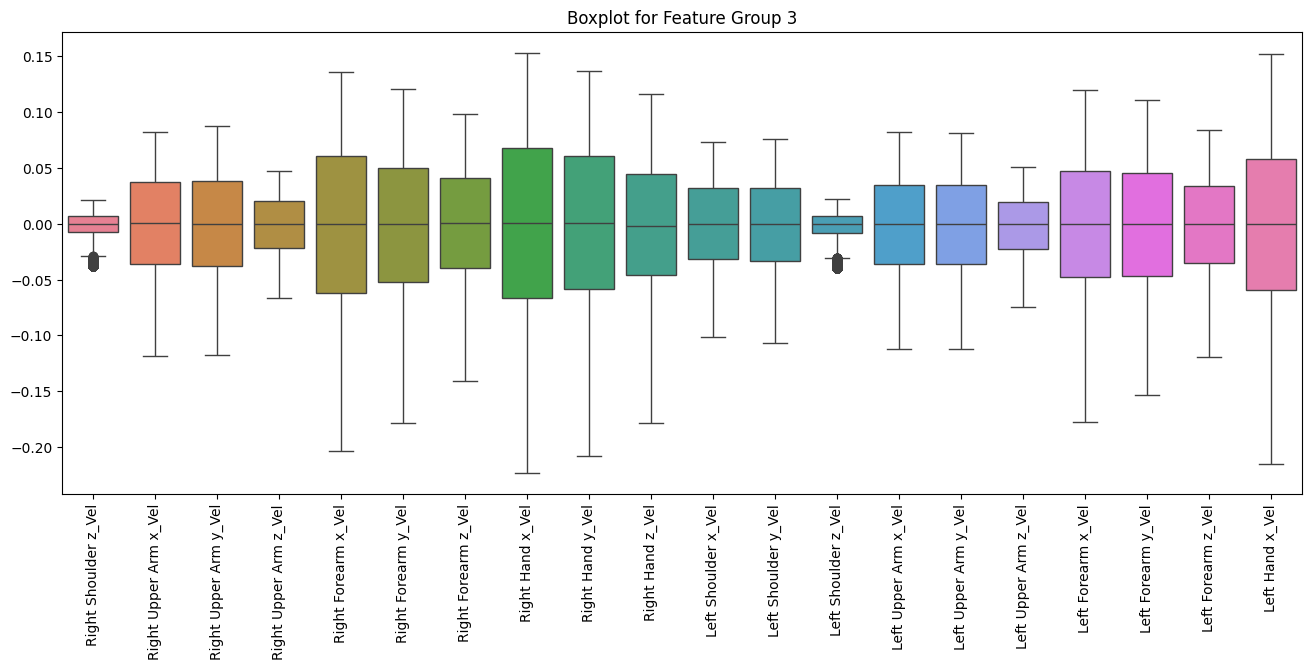

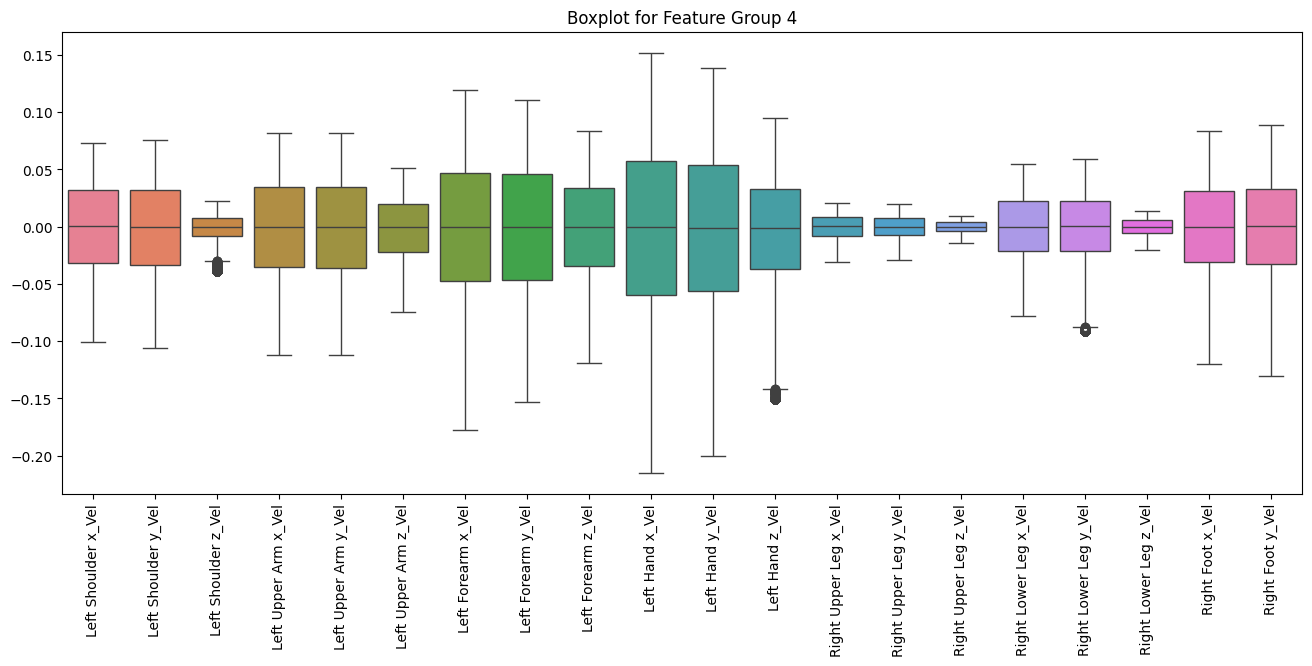

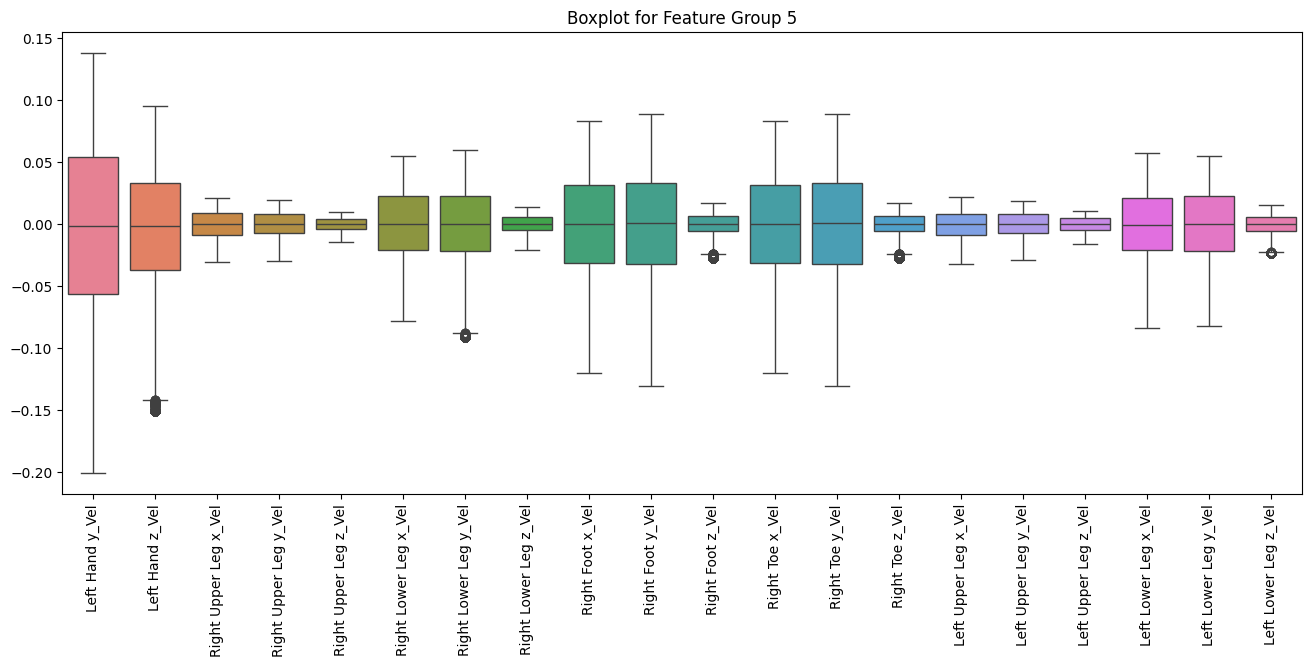

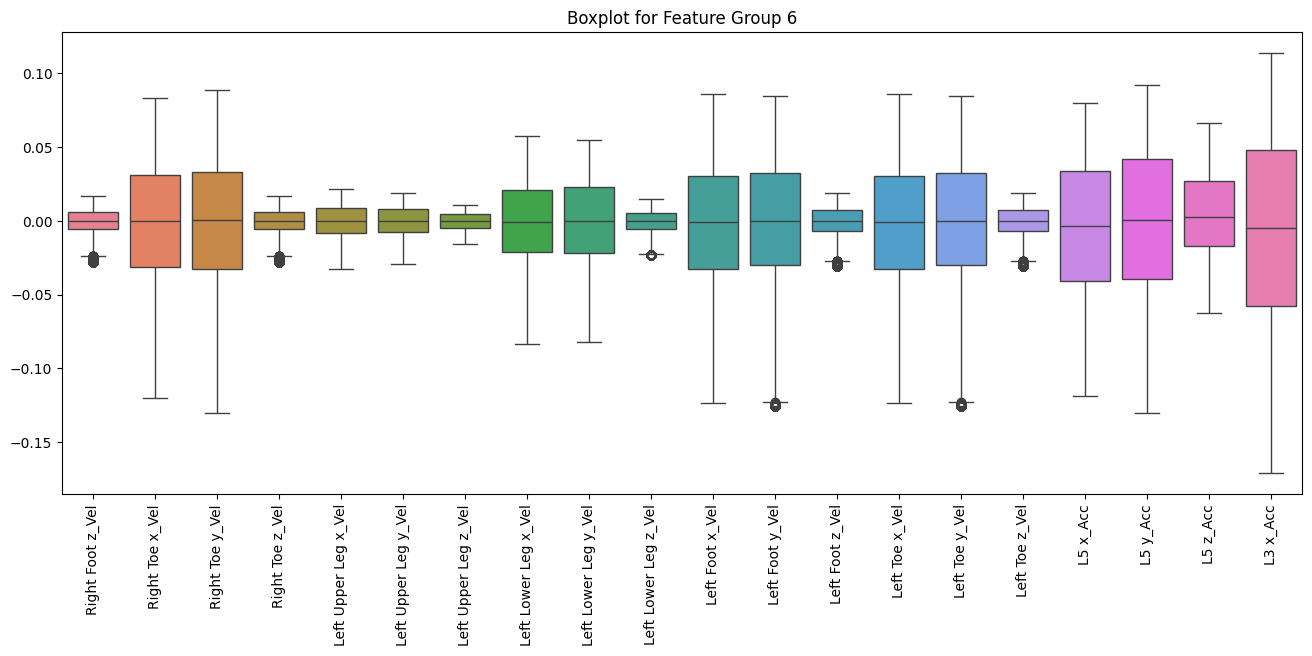

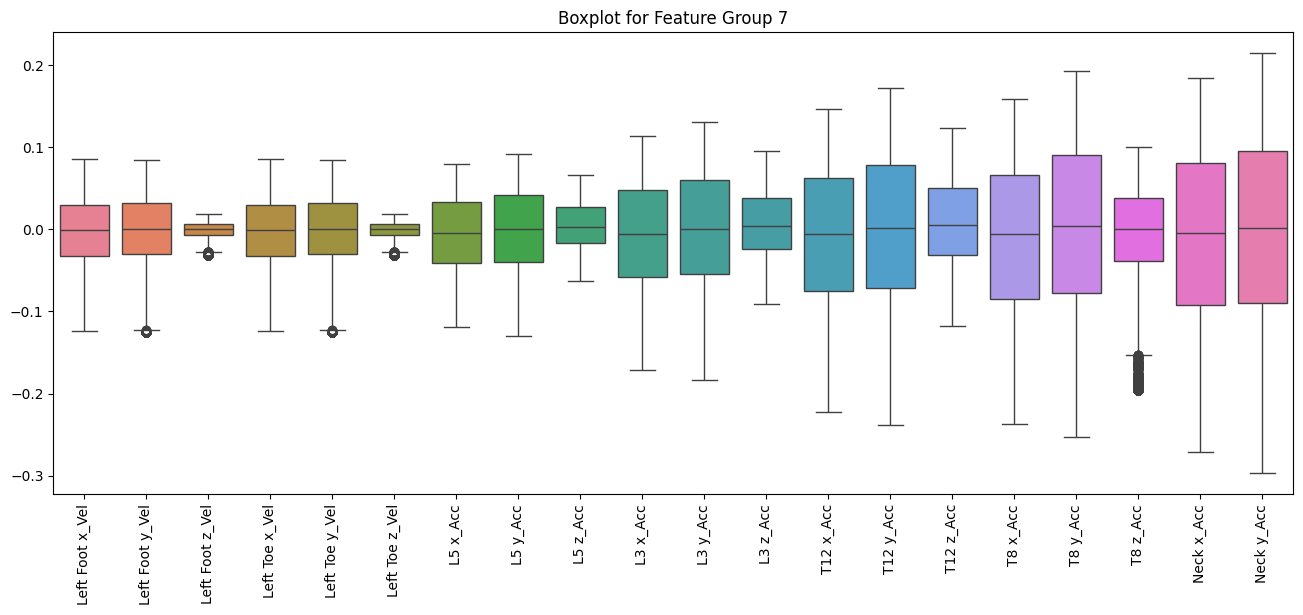

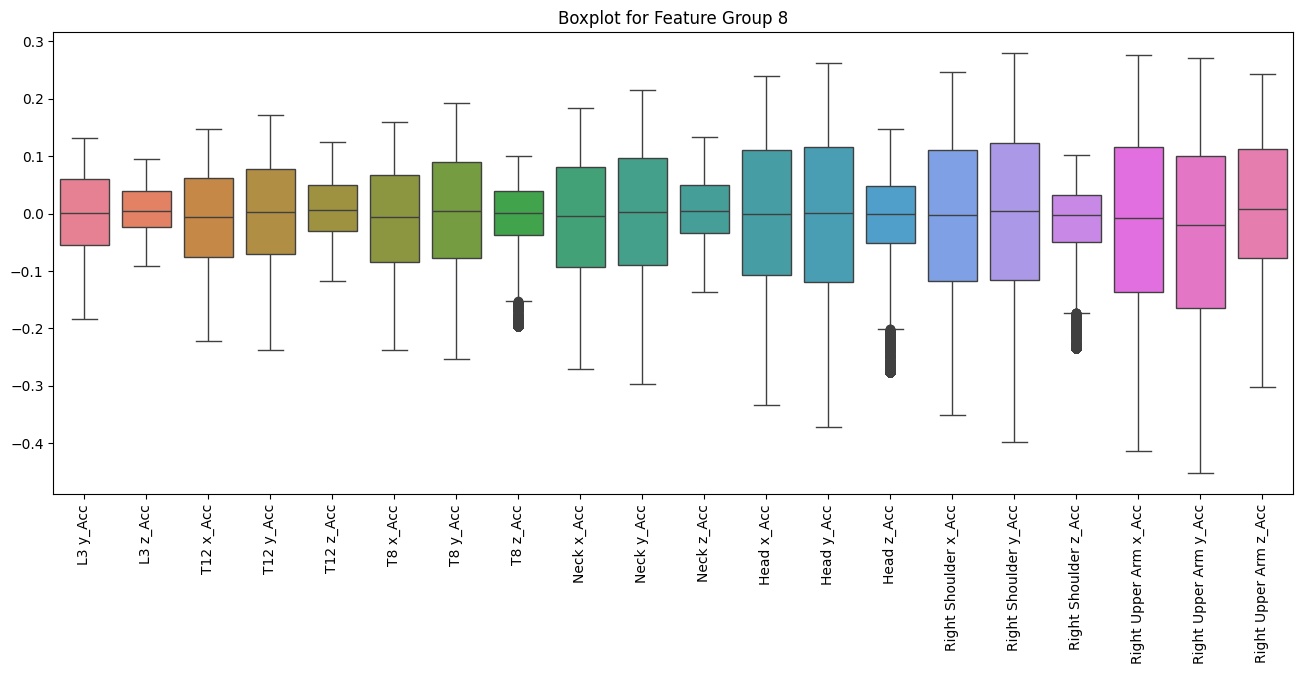

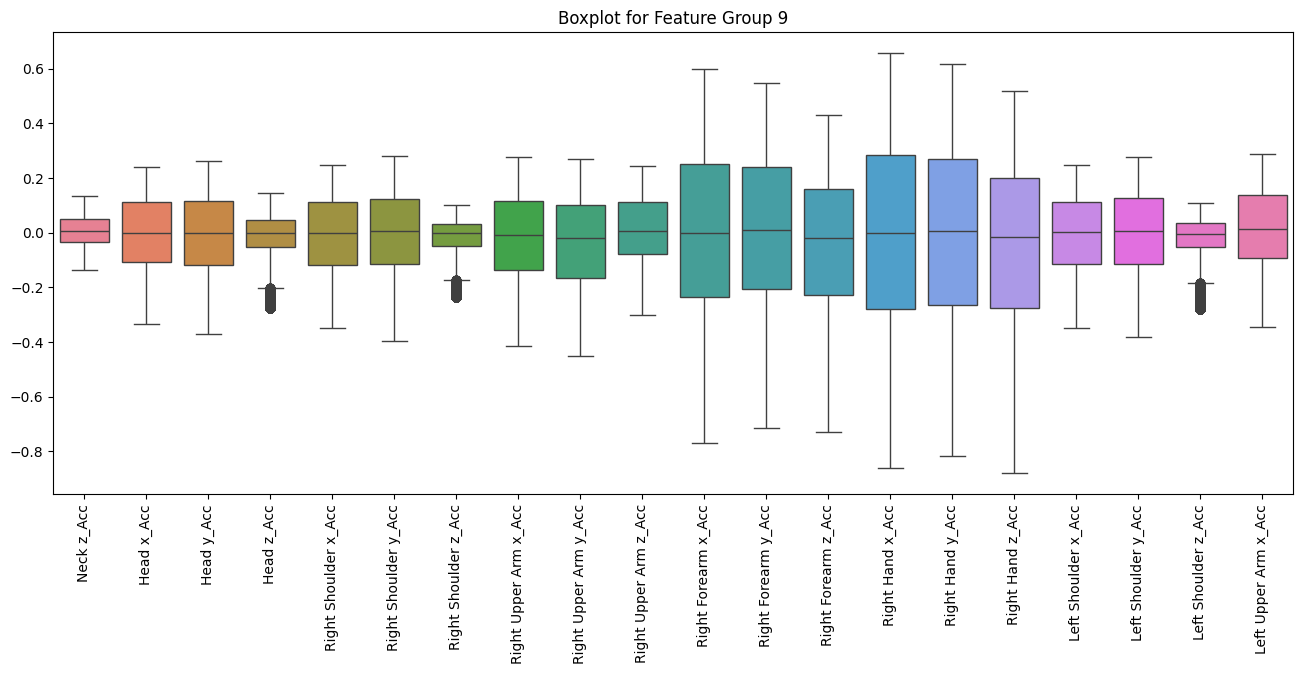

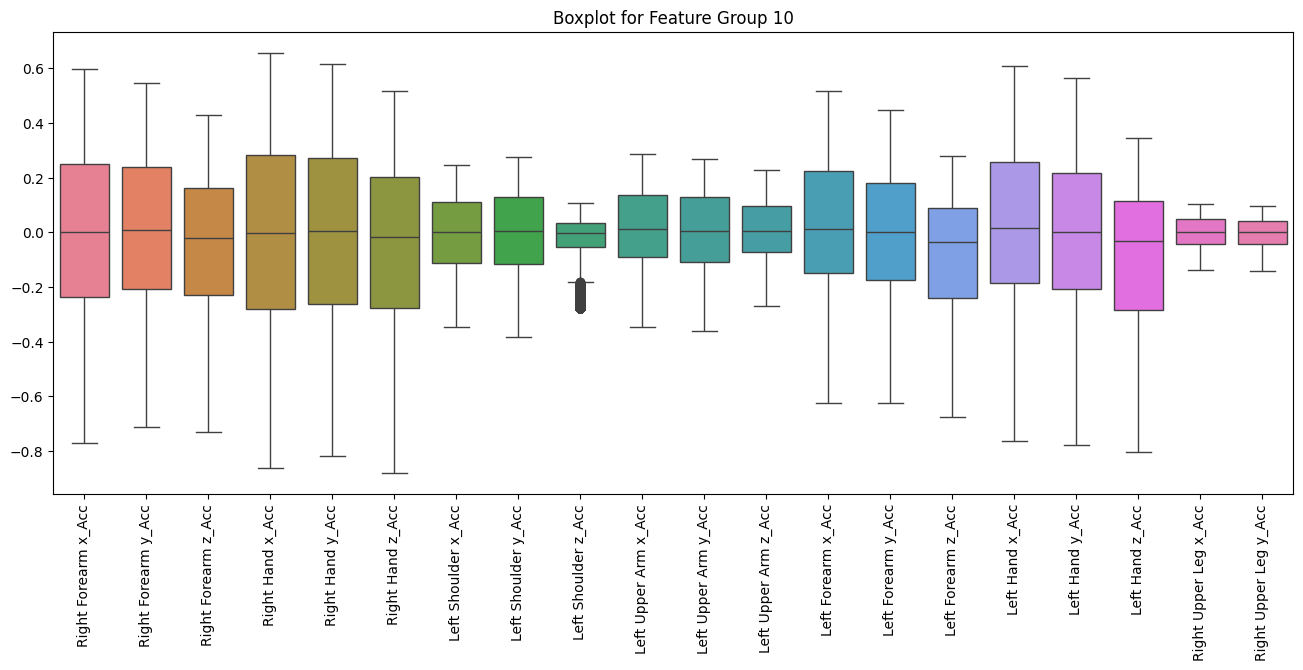

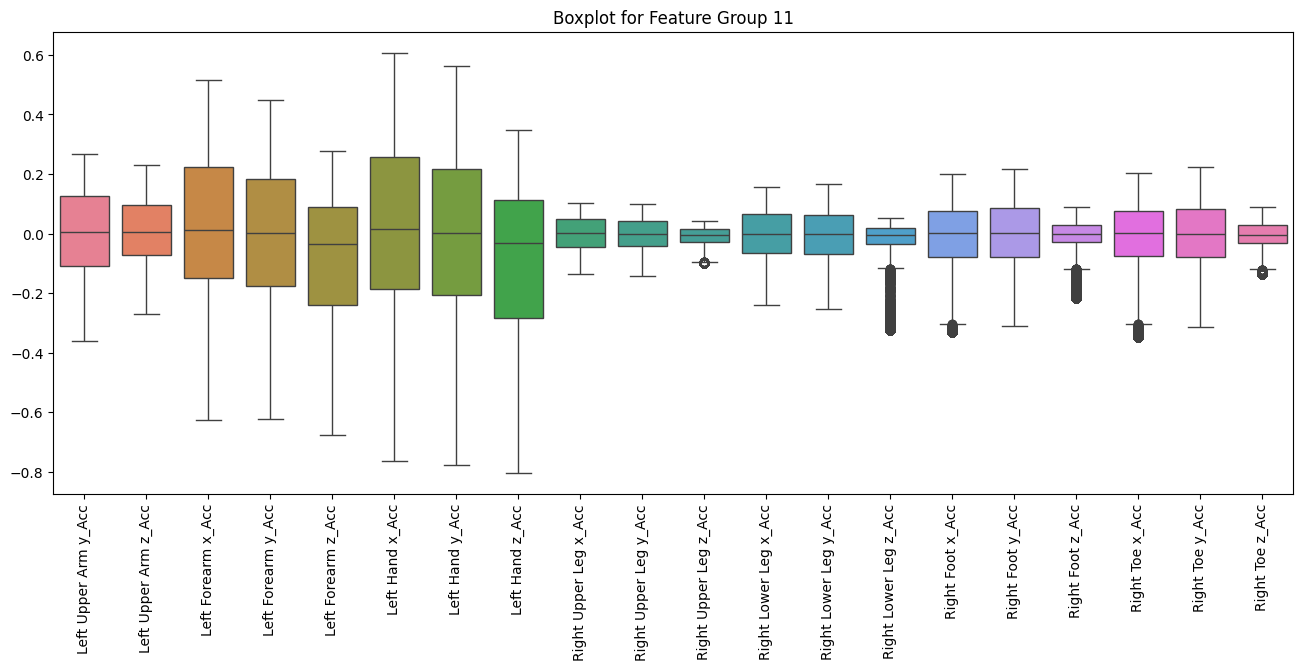

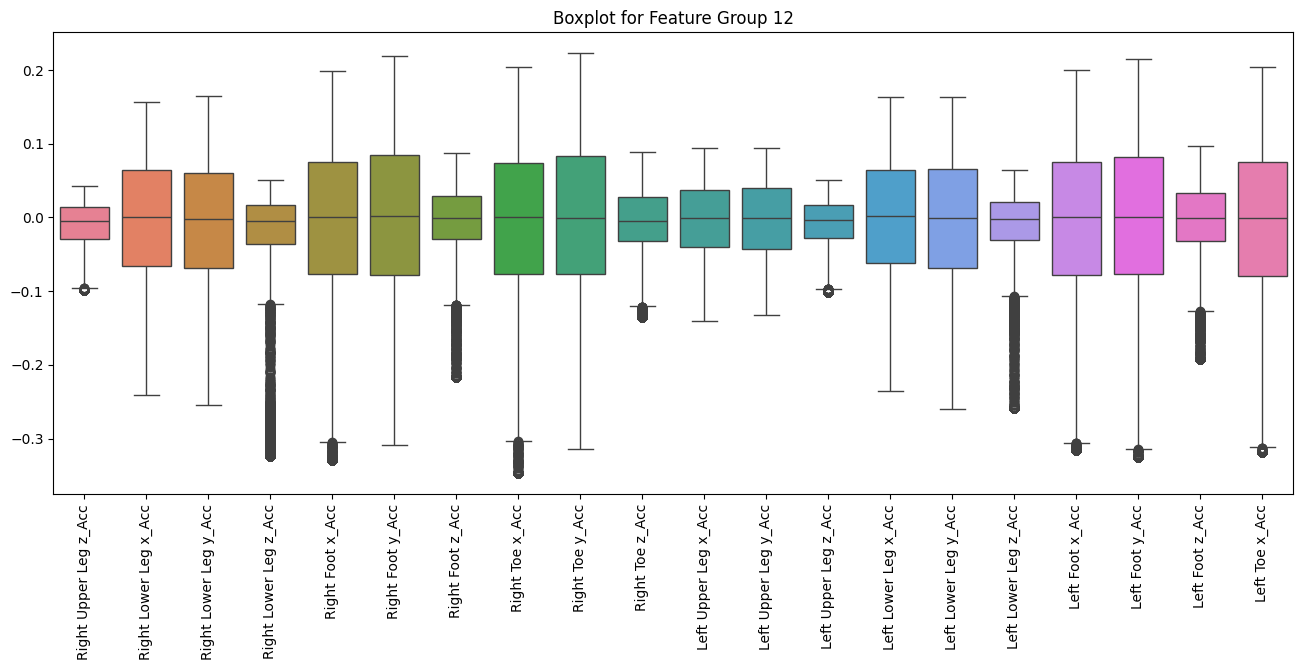

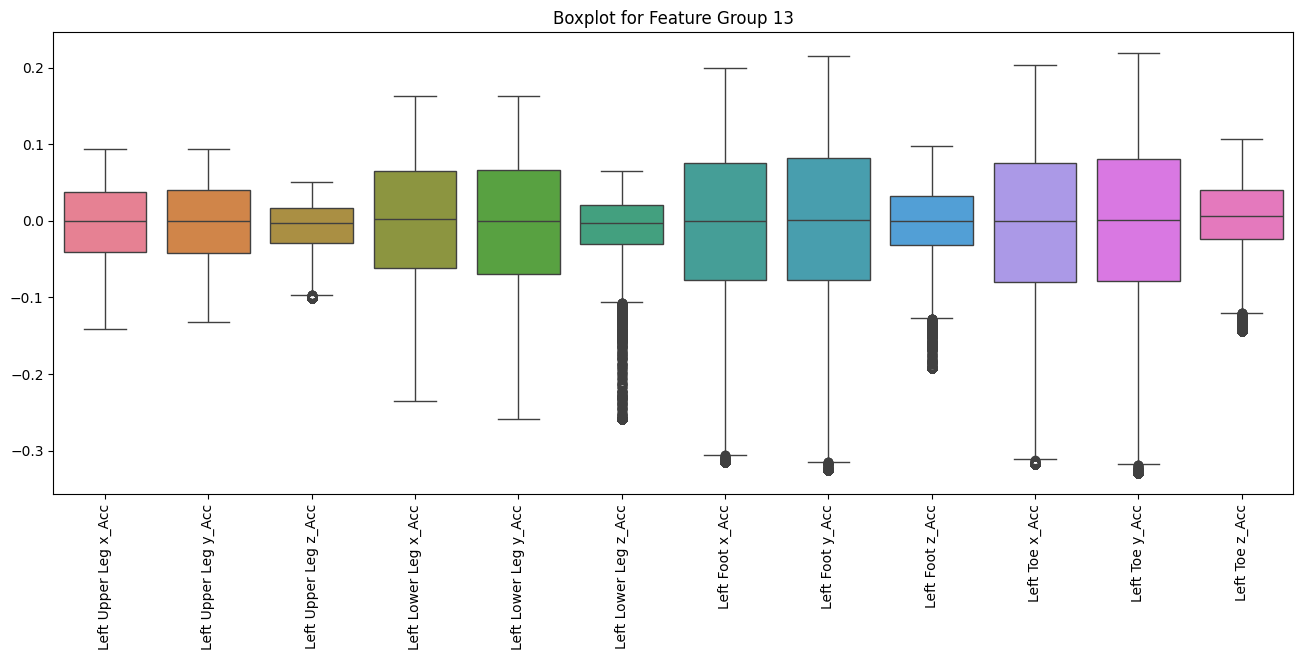

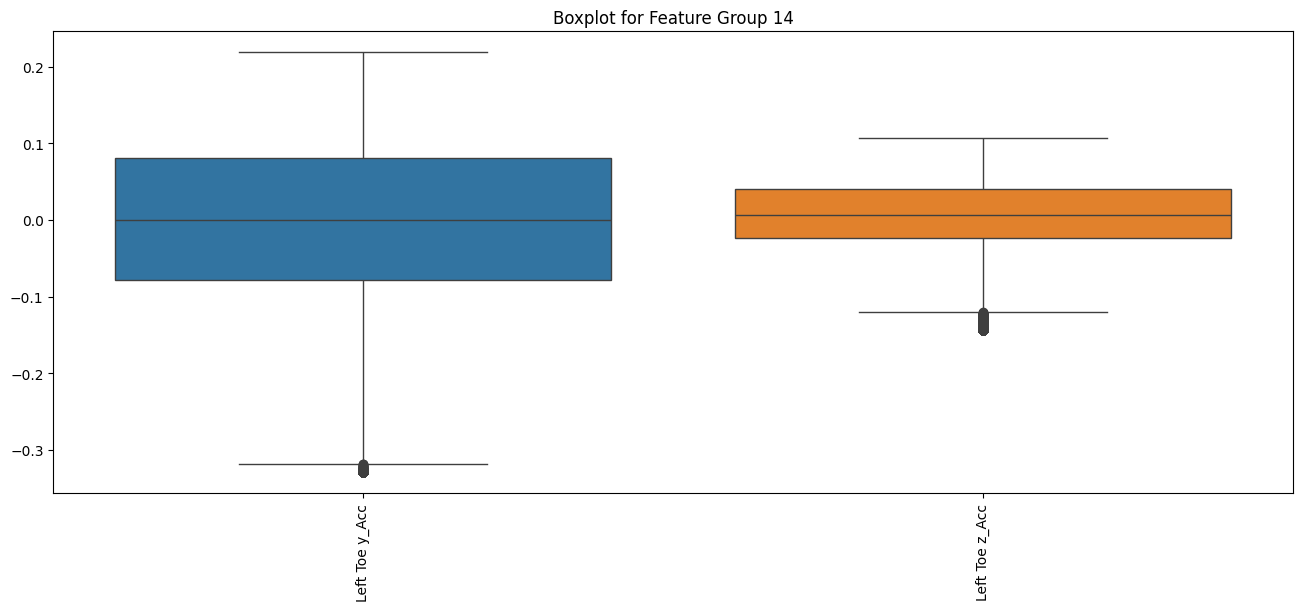

In [9]:
# Capping the outliers using winsorization
from scipy.stats.mstats import winsorize

# Apply the winsorization method to cap the outliers
df[numerical_columns] = df[numerical_columns].apply(lambda x: winsorize(x, limits=[0.05, 0.1]))

# Call the function to visualize the outliers for each group after winsorization
plot_outliers(df, feature_groups)


## 1.4 - Check for class consistency

In [10]:
# Check for inconsistent categories in categorical variables
categorical_columns = df.select_dtypes(include=['category']).columns

for col in categorical_columns:
    print(f'Unique categories in {col}: {df[col].unique()}')
    

Unique categories in Label: [4, 0, 2, 3, 8, 1, 5, 7, 6]
Categories (9, int64): [0, 1, 2, 3, ..., 5, 6, 7, 8]
Unique categories in Knife_Sharpness_Category: [0, 1, 2]
Categories (3, int64): [0, 1, 2]
Unique categories in Main_Activity: [0, 1]
Categories (2, int64): [0, 1]


In [ ]:
# Save the cleaned dataset
df.to_csv('data\\final_data\\cleaned_allworkers.csv', index=False)

# 2 - EDA

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools


In [15]:
print(df.head())  # First few rows



  Label Knife_Sharpness_Category  L5 x_Vel  L5 y_Vel  L5 z_Vel  L3 x_Vel  \
0     4                        0  0.027806 -0.051742 -0.057466  0.022352   
1     4                        0  0.043772 -0.035047 -0.057466  0.052638   
2     4                        0 -0.019464  0.056012 -0.057466 -0.017915   
3     0                        0 -0.136964  0.101034 -0.057466 -0.138453   
4     0                        0 -0.040060 -0.060612 -0.057466 -0.038808   

   L3 y_Vel  L3 z_Vel  T12 x_Vel  T12 y_Vel  ...  Left Lower Leg x_Acc  \
0 -0.049677 -0.057988   0.021686  -0.046641  ...              0.132128   
1 -0.037024 -0.057988   0.060847  -0.039494  ...             -0.174994   
2  0.053371 -0.057988  -0.024526   0.051374  ...              0.052290   
3  0.113083 -0.057988  -0.137405   0.122685  ...              0.095499   
4 -0.068069 -0.057988  -0.037377  -0.075789  ...              0.037040   

   Left Lower Leg y_Acc  Left Lower Leg z_Acc  Left Foot x_Acc  \
0             -0.070723         

In [14]:
print(df.describe().T)  # Summary statistics for numerical variables

                  count      mean       std       min       25%       50%  \
L5 x_Vel         8840.0 -0.011160  0.063468 -0.144146 -0.050015 -0.005936   
L5 y_Vel         8840.0  0.020432  0.067942 -0.121069 -0.023475  0.023498   
L5 z_Vel         8840.0 -1.777840  1.149936 -3.616572 -2.763266 -1.786975   
L3 x_Vel         8840.0 -0.011028  0.064153 -0.145651 -0.049869 -0.006291   
L3 y_Vel         8840.0  0.020247  0.067700 -0.118776 -0.024690  0.023239   
...                 ...       ...       ...       ...       ...       ...   
Left Foot y_Acc  8840.0 -0.006184  0.140659 -0.325107 -0.076925  0.000620   
Left Foot z_Acc  8840.0 -0.006470  0.069646 -0.191993 -0.031333 -0.000318   
Left Toe x_Acc   8840.0 -0.009496  0.136020 -0.318188 -0.079940 -0.000171   
Left Toe y_Acc   8840.0 -0.006760  0.142522 -0.329491 -0.078924  0.000464   
Left Toe z_Acc   8840.0  0.004514  0.063023 -0.143588 -0.024028  0.006595   

                      75%       max  
L5 x_Vel         0.034040  0.084746  

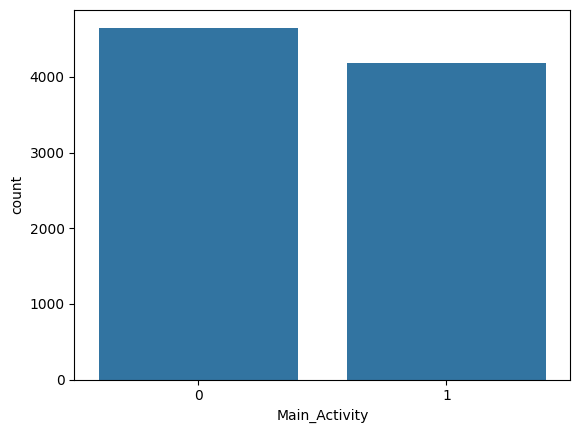

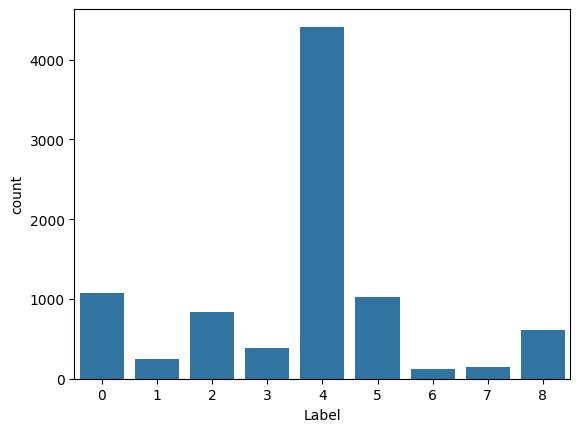

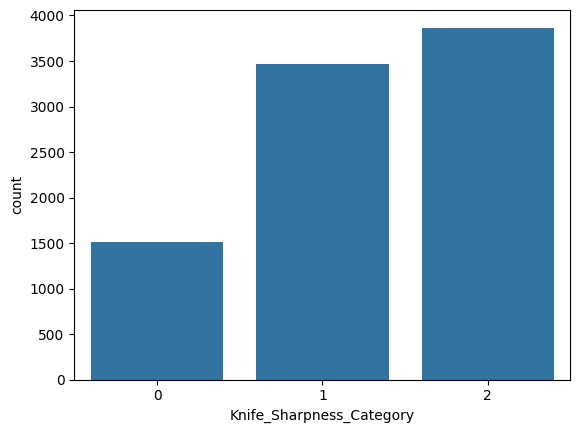

In [16]:
categorical_columns = ['Main_Activity', 'Label', 'Knife_Sharpness_Category']
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for var in categorical_columns:
    plt.figure()
    sns.countplot(x=var, data=df)
    plt.show()

In [ ]:
# Create the plot
fig = plot_feature_distributions(
    df=df,
    feature_cols=numerical_columns,
    target_cols=categorical_columns,
    n_cols=3,  # Number of columns in the grid
    figsize=(15, None)  # Width=15, height auto-calculated
)

# Show the plot
plt.show()

## Multivariate analysis
